# QLS project: 
# Inferring macro-ecological patterns from local presence/absence data
# DATA

In [14]:
import numpy as np
import numpy.random as random
from random import sample
import scipy.optimize as optimization
from scipy.stats import nbinom
import matplotlib.pyplot as plt
import pandas as pd
import itertools   
import json

## French birds dataset (2010)



In [108]:
df = pd.read_csv(r'FrenchBBS_2010_mat.csv')
df

,0,0.1,ACCGEN,ACCNIS,ACRARU,ACRRIS,ACRSCH,ACRSCI,ACTHYP,AEGCAU,...,TRITOT,TROTRO,TURILI,TURMER,TURPHI,TURPIL,TURTOR,TURVIS,UPUEPO,VANVAN
0,83100,2406200,0,0,0,0,3,0,0,0,...,0,16,0,15,13,0,0,0,0,0
1,99100,2418200,0,2,0,0,0,0,0,0,...,0,13,0,12,1,0,0,0,0,0
2,105100,2414200,0,0,0,0,0,0,0,2,...,0,24,0,23,5,0,0,0,0,0
3,109100,2396200,0,3,0,0,0,0,0,0,...,0,34,0,38,30,0,0,1,0,0
4,149100,2408200,0,0,0,0,0,0,0,0,...,0,11,0,21,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,999100,2408200,0,0,0,0,0,0,0,0,...,0,2,0,32,0,0,0,0,0,0
1063,999100,2434200,0,0,0,0,0,0,0,0,...,0,3,0,18,2,0,0,0,0,0
1064,1009100,2424200,0,0,0,0,0,4,0,0,...,0,1,0,15,0,0,0,0,0,0
1065,1023100,2446200,0,0,0,4,0,5,0,1,...,0,0,0,19,15,0,0,0,0,0


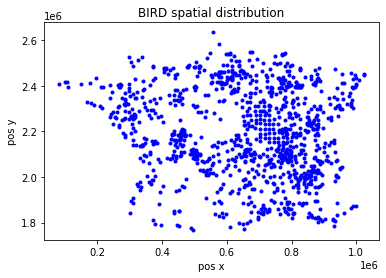

In [109]:
plt.plot(df['0'],df['0.1'],'b.')
plt.title('BIRD spatial distribution')
plt.xlabel('pos x')
plt.ylabel('pos y')
plt.savefig('images/BIRD.png')
plt.show()

In [110]:
df.to_csv('cumRSABIRD.csv',index=None,header=True)

In [111]:
bin_edges = [2**n for n in range(16)]
bin_edges

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

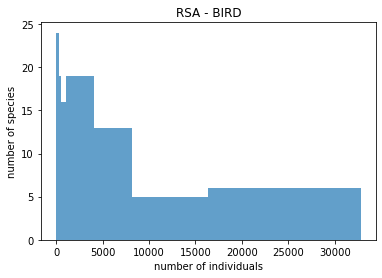

In [112]:
#CUMULATIVE RSA
nr_ind = df.sum(axis=0)[2:]

plt.hist(nr_ind,bins=bin_edges,cumulative=False,density=False,alpha=0.7)
#plt.xscale('log')
plt.xlabel('number of individuals')
plt.ylabel('number of species')
plt.title('RSA - BIRD')
#plt.savefig('RSABIRD.png')
plt.show()

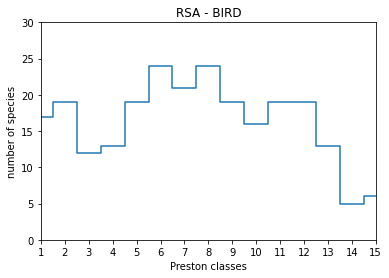

In [113]:
A,B = np.histogram(nr_ind,bins=bin_edges)

plt.step(np.arange(1,16),A,where='mid')
plt.xticks(np.arange(1,16))
plt.xlim(1,15)
plt.ylim(0,30)
plt.xlabel('Preston classes')
plt.ylabel('number of species')
plt.title('RSA - BIRD')
plt.savefig('images/RSABIRD.png')
plt.show()

In [21]:
df1 = df.drop(['0', '0.1'], axis=1)
for r in range(df1.shape[0]):
    for c in range(df1.shape[1]):
        if df1.iloc[r][c]!=0:
            df1.iloc[r][c]=1

In [22]:
df1

,ACCGEN,ACCNIS,ACRARU,ACRRIS,ACRSCH,ACRSCI,ACTHYP,AEGCAU,AEGMON,AIXGAL,...,TRITOT,TROTRO,TURILI,TURMER,TURPHI,TURPIL,TURTOR,TURVIS,UPUEPO,VANVAN
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1063,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1064,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1065,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


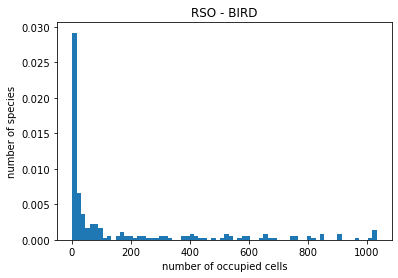

In [23]:
#species and nr of occupied cells
plt.hist(df1.sum(axis=0),bins=70,density=True)
plt.xlabel('number of occupied cells')
#plt.xscale('log')
plt.ylabel('number of species')
plt.title('RSO - BIRD')
plt.show()

In [24]:
df1.to_csv('dfbirdpa.csv',index=None,header=True)

## Barro Colorado Island dataset

In [97]:
#original dataframe
df = pd.read_csv(r'BCIdata.csv')

#keep only alive species
df = df[df['status']=='A']

sp_name = df['sp'].unique()
species = np.arange(1,len(sp_name)+1)
Sstar = len(species)

#associate to each species a number
CODE_LIST = []
for i in df['sp']:
    ind = np.where(sp_name==i)
    CODE_LIST.append(int(species[ind]))
    
df['sp_num'] = CODE_LIST

In [98]:
#keep only relevant info
df1 = pd.DataFrame({'sp':df['sp'],
                    'sp_num':df['sp_num'],
                    'gx':df['gx'],
                    'gy':df['gy']})
df1

,sp,sp_num,gx,gy
18,gustsu,1,994.099976,488.299988
20,virosu,2,990.500000,488.899994
22,quaras,3,993.500000,498.299988
23,protte,4,992.700012,469.299988
24,brosal,5,981.900024,473.500000
...,...,...,...,...
394653,tri2tu,7,996.210022,498.690002
394654,swars2,139,997.390015,496.529999
394655,hybapr,146,995.200012,490.859985
394656,protpa,144,999.039978,491.279999


In [99]:
#associate to each gx,gy its column/row
bottomLeft = (0,0)
bottomRight = (1000,0)
topLeft = (0,500)
topRight = (1000,500)

cols = np.linspace(bottomLeft[0], bottomRight[0], num=41)
#cols = cols[cols!=0]
rows = np.linspace(bottomLeft[1], topLeft[1], num=21)
#rows = rows[rows!=0]

colonne = []
righe = []
for i in range(len(df1)):
    colonne.append(np.searchsorted(cols, df1['gx'].iloc[i]))
    righe.append(np.searchsorted(rows, df1['gy'].iloc[i]))
    
df1['col'] = colonne
df1['row'] = righe

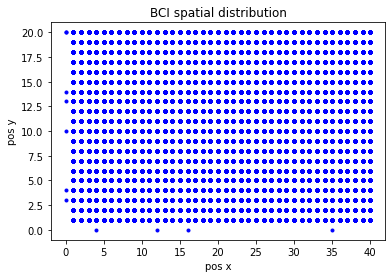

In [100]:
plt.plot(df1['col'],df1['row'],'b.')
plt.title('BCI spatial distribution')
plt.xlabel('pos x')
plt.ylabel('pos y')
plt.savefig('images/BCI.png')
plt.show()

In [101]:
#associate to each tree its cell
M = 800
cells_matrix = np.arange(1,M+1)
cells_matrix = cells_matrix.reshape(20,40)   

cells = []
for i in range(len(df1)):
    cells.append(cells_matrix[df1['row'].iloc[i]-1,df1['col'].iloc[i]-1])
    
df1['cell'] = cells

In [102]:
df1

,sp,sp_num,gx,gy,col,row,cell
18,gustsu,1,994.099976,488.299988,40,20,800
20,virosu,2,990.500000,488.899994,40,20,800
22,quaras,3,993.500000,498.299988,40,20,800
23,protte,4,992.700012,469.299988,40,19,760
24,brosal,5,981.900024,473.500000,40,19,760
...,...,...,...,...,...,...,...
394653,tri2tu,7,996.210022,498.690002,40,20,800
394654,swars2,139,997.390015,496.529999,40,20,800
394655,hybapr,146,995.200012,490.859985,40,20,800
394656,protpa,144,999.039978,491.279999,40,20,800


In [103]:
df1 = df1.sort_values(by=['cell'])
prova = pd.DataFrame({'sp' : df1['sp'],
                      'sp_num': df1['sp_num'],
                      'cell' : df1['cell']})
prova

,sp,sp_num,cell
226474,protco,175,1
230973,guargu,10,1
230971,faraoc,126,1
230967,hybapr,146,1
230966,ingaqu,167,1
...,...,...,...
268476,pipeae,187,800
268468,zantpr,129,800
268467,tri2tu,7,800
268492,mar1la,56,800


In [104]:
prova.to_csv('cumRSABCI.csv',index=None,header=True)

In [105]:
bin_edges = [2**n for n in range(16)]
bin_edges

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

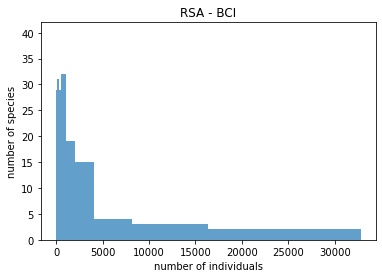

In [106]:
plt.hist(prova['sp'].value_counts(),bins=bin_edges,alpha=0.7)#,cumulative=True)
plt.xlabel('number of individuals')
plt.ylabel('number of species')
plt.title('RSA - BCI')
#plt.savefig('RSABCI.png')
plt.show()

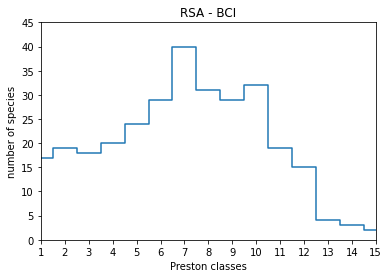

In [107]:
nr_ind = prova['sp'].value_counts()

A,B = np.histogram(nr_ind,bins=bin_edges)

plt.step(np.arange(1,16),A,where='mid')
plt.xticks(np.arange(1,16))
plt.xlim(1,15)
plt.ylim(0,45)
plt.xlabel('Preston classes')
plt.ylabel('number of species')
plt.title('RSA - BCI')
plt.savefig('images/RSABCI.png')
plt.show()

MxS presence/absence matrix 

In [ ]:
#all the (unique) species that are present in cell i=1..M
lista = []
for i in range(1,M+1):  
    lista.append(prova['sp_num'][prova['cell']==i].unique())
    
a = np.zeros((M,Sstar))
for s in species:  #species=species_code=1...302
    for c in range(M):
        if s in lista[c]:
            a[c,s-1]=1
        else:
            a[c,s-1]=0

In [ ]:
dfpa_bci = pd.DataFrame(columns=species, index=np.arange(1,M+1))

for r in range(M):
    dfpa_bci.loc[r+1] = a[r]
dfpa_bci

In [ ]:
A = dfpa_bci.sum(axis=0)
A = A[A!=0]
print(len(A))

In [ ]:
dfpa_bci.to_csv('dfbcipa.csv',index=None)

In [ ]:
BCIpa = pd.DataFrame.to_numpy(dfpa_bci)

## In-silico dataset

### RSA : Negative Binomial

Python parameters: N,n,p\
Paper parameters: n,r,1- ξ

r = 0.8 and ξ = 0.999 

In [4]:
bin_edges = [2**n for n in range(14)]
bin_edges

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

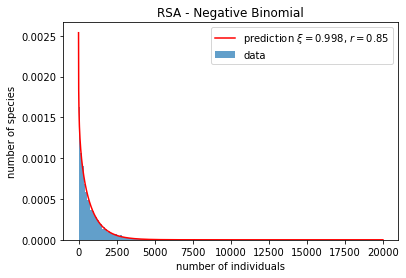

In [52]:
random.seed(96)
S = 5000
r = 0.8
csi = 0.999
#x = np.arange(1,20000)
RSAnb = np.round(random.negative_binomial(r,1-csi,S))
plt.plot(nbinom.pmf(x, 0.854, 1-0.9989),'r-',label=r'prediction $\xi = 0.998$, $r=0.85$')

plt.hist(RSAnb,bins=70,alpha=0.7,density=True,label='data')
plt.xlabel('number of individuals')
plt.ylabel('number of species')
plt.title('RSA - Negative Binomial')
plt.legend()
#plt.xticks(bin_edges)
#plt.xlim(0,128)
plt.savefig('images/RSANBresult.png')
plt.show()

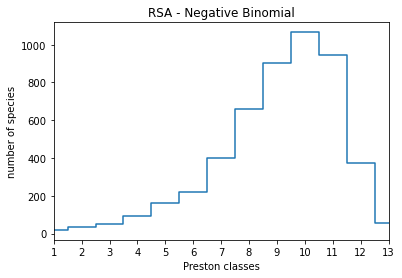

In [35]:
nr_ind = RSAnb

A,B = np.histogram(nr_ind,bins=bin_edges)

plt.step(np.arange(1,14),A,where='mid')
plt.xticks(np.arange(1,14))
plt.xlim(1,13)
plt.xlabel('Preston classes')
plt.ylabel('number of species')
plt.title('RSA - Negative Binomial')
#plt.savefig('images/RSANB.png')
plt.show()

In [ ]:
RSAnb = RSAnb[RSAnb!=0]
S1 = len(RSAnb)
S1

In [ ]:
species = np.arange(1,S1+1)
pop = [[species[i]]*int(RSAnb[i]) for i in range(S1)]
population = [item for sublist in pop for item in sublist]

Distribute data at random in M cells

In [6]:
M = 98*98

In [ ]:
dfnb = pd.DataFrame({'sp':population,
                     'cell':random.randint(1,M+1,len(population))})
                     #'gx':random.randint(0,4900,len(population)),
                     #'gy':random.randint(0,4900,len(population))})
dfnb

In [ ]:
#all the (unique) species that are present in cell i
lista = []
for i in range(1,M+1):  
    lista.append(dfnb['sp'][dfnb['cell']==i].unique())
    
a = np.zeros((M,S1))
for s in species:
    for c in range(M):
        if s in lista[c]:
            a[c,s-1]=1
        else:
            a[c,s-1]=0


In [ ]:
dfnbpa = pd.DataFrame(columns=species, index=np.arange(1,M+1))

for r in range(M):
    dfnbpa.loc[r+1] = a[r]
dfnbpa

In [ ]:
dfnbpa.to_csv('dfnbpa.csv',index=None)

In [ ]:
NBpa = pd.DataFrame.to_numpy(dfnbpa)

Divide the forest into M = 98x98 cells - NON SERVE, HO DISTRIBUTIO GIà LA FORESTA NELLE CELLE

In [ ]:
""""
#associate to each gx,gy its column/row
bottomLeft = (0,0)
bottomRight = (4900,0)
topLeft = (0,4900)
topRight = (4900,4900)

cols = np.linspace(bottomLeft[0], bottomRight[0], num=99)
#cols = cols[cols!=0]
rows = np.linspace(bottomLeft[1], topLeft[1], num=99)
#rows = rows[rows!=0]

colonne = []
righe = []
for i in range(len(dfnb)):
    colonne.append(np.searchsorted(cols, dfnb['gx'].iloc[i]))
    righe.append(np.searchsorted(rows, dfnb['gy'].iloc[i]))
    
dfnb['col'] = colonne
dfnb['row'] = righe
""""

In [ ]:
"""
#associate to each tree its cell
cells_matrix_nb = np.arange(1,9604+1)
cells_matrix_nb = cells_matrix_nb.reshape(98,98)   

cells = []
for i in range(len(dfnb)):
    cells.append(cells_matrix_nb[dfnb['row'].iloc[i]-1,dfnb['col'].iloc[i]-1])
    
dfnb['cell'] = cells
dfnb
"""

### RSA : Log-Normal
 µ=5 and σ=1

In [53]:
bin_edges = [2**n for n in range(13)]
bin_edges

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

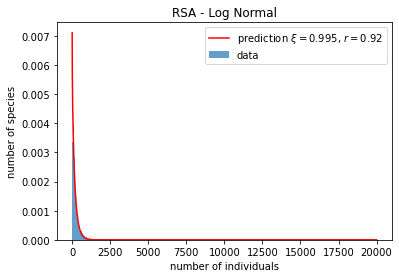

In [57]:
random.seed(124)
S2 = 5000
mu = 5
sigma = 1

RSAln = np.round(random.lognormal(mu,sigma,S2))

plt.plot(nbinom.pmf(x, 0.916, 1-0.995),'r-',label=r'prediction $\xi = 0.995$, $r=0.92$')

plt.hist(RSAln,bins=70,alpha=0.7,density=True,label='data')
plt.xlabel('number of individuals')
plt.ylabel('number of species')
plt.title('RSA - Log Normal')
#plt.xticks(bin_edges)
plt.legend()
plt.savefig('images/RSALNresult.png')
plt.show()


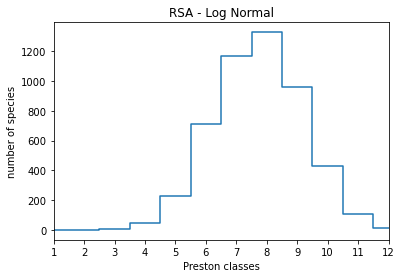

In [96]:
nr_ind = RSAln

A,B = np.histogram(nr_ind,bins=bin_edges)

plt.step(np.arange(1,13),A,where='mid')
plt.xticks(np.arange(1,13))
plt.xlim(1,12)
plt.xlabel('Preston classes')
plt.ylabel('number of species')
plt.title('RSA - Log Normal')
plt.savefig('images/RSALN.png')
plt.show()

In [3]:
#df with abundances
#dfln = pd.DataFrame({'species':np.arange(1,S2+1),
#                     'individuals':RSAln})
#int(sum(dfln['individuals']))

In [4]:
species = np.arange(1,S2+1)
pop = [[species[i]]*int(RSAln[i]) for i in range(S2)]
population = [item for sublist in pop for item in sublist]
    

Distribute data at random in M cells

In [7]:
dfln = pd.DataFrame({'sp':population,
                     'cell':random.randint(1,M+1,len(population))})
                     #'gx':random.randint(0,4900,len(population)),
                     #'gy':random.randint(0,4900,len(population))})
dfln

,sp,cell
0,1,6301
1,1,814
2,1,1857
3,1,8215
4,1,186
...,...,...
1208845,5000,3404
1208846,5000,677
1208847,5000,5505
1208848,5000,5115


MxS presence/absence matrix a p*

In [8]:
#all the (unique) species that are present in cell i
lista = []
for i in range(1,M+1):  
    lista.append(dfln['sp'][dfln['cell']==i].unique())
    
a = np.zeros((M,S2))
for s in species:
    for c in range(M):
        if s in lista[c]:
            a[c,s-1]=1
        else:
            a[c,s-1]=0

In [9]:
dflnpa = pd.DataFrame(columns=species, index=np.arange(1,M+1))

for r in range(M):
    dflnpa.loc[r+1] = a[r]
dflnpa

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9602,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dflnpa.to_csv('dflnpa.csv',index=None)

In [11]:
LNpa = pd.DataFrame.to_numpy(dflnpa)

## 5% of in-silico forests

From loaded data

In [ ]:
#5%
M = 98*98
p = 0.05
x = np.int(M*p)
print(x)

In [ ]:
#NEG BIN

#load dataframe with saved data of the whole forest
dfnb = pd.read_csv(r'dfnbpa.csv')
#set the correct index
dfnb.set_index(np.arange(1,len(dfnb)+1,dtype=int))
#sample at random 5% of the index
rnd_index = random.randint(1,len(dfnb),x) 
NBpa5 = dfnb.iloc[rnd_index]
#save the 5% df as csv
NBpa5.to_csv('NBpa5_file.csv',index=None)

In [ ]:
#LOG NORM

#load dataframe with saved data of the whole forest
dfln = pd.read_csv(r'dflnpa.csv')
#set the correct index
dfln.set_index(np.arange(1,len(dfln)+1,dtype=int))
#sample at random 5% of the index
rnd_index = random.randint(1,len(dfln),x) 
LNpa5 = dfln.iloc[rnd_index]
#save the 5% df as csv
LNpa5.to_csv('LNpa5_file.csv',index=None)